In [1]:
import pandas as pd
import numpy as np

**<h3>Exploratory Data Analysis(EDA)</h3>**

In [2]:
df_cust = pd.read_csv("/Users/yashraj146/Downloads/Customers.csv")
print(df_cust.shape)
df_cust

(200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [3]:
df_prod = pd.read_csv("/Users/yashraj146/Downloads/Products.csv")
print(df_prod.shape)
df_prod

(100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [4]:
df_trans = pd.read_csv("/Users/yashraj146/Downloads/Transactions.csv")
print(df_trans.shape)
df_trans

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
df_cust.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
df_prod.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [7]:
df_trans.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [8]:
df_cust.duplicated().sum()

np.int64(0)

In [9]:
df_prod.duplicated().sum()

np.int64(0)

In [10]:
df_trans.duplicated().sum()

np.int64(0)

In [11]:
merged_df = df_trans.merge(df_cust, on = 'CustomerID').merge(df_prod, on = 'ProductID')

<h4>Convert date columns to datetime</h4>

In [12]:
df_trans['TransactionDate'] = pd.to_datetime(df_trans['TransactionDate'])
df_cust['SignupDate'] = pd.to_datetime(df_cust['SignupDate'])

**<h4>1. Bestsellers</h4>**

In [13]:
bestsellers = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending = False)
print(bestsellers)

ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int64


**<h4>2. Top Customer</h4>**

In [14]:
top_cust = merged_df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending = False)
print(top_cust[:5])

CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


**<h4>3. Monthly Sales Trends</h4>**

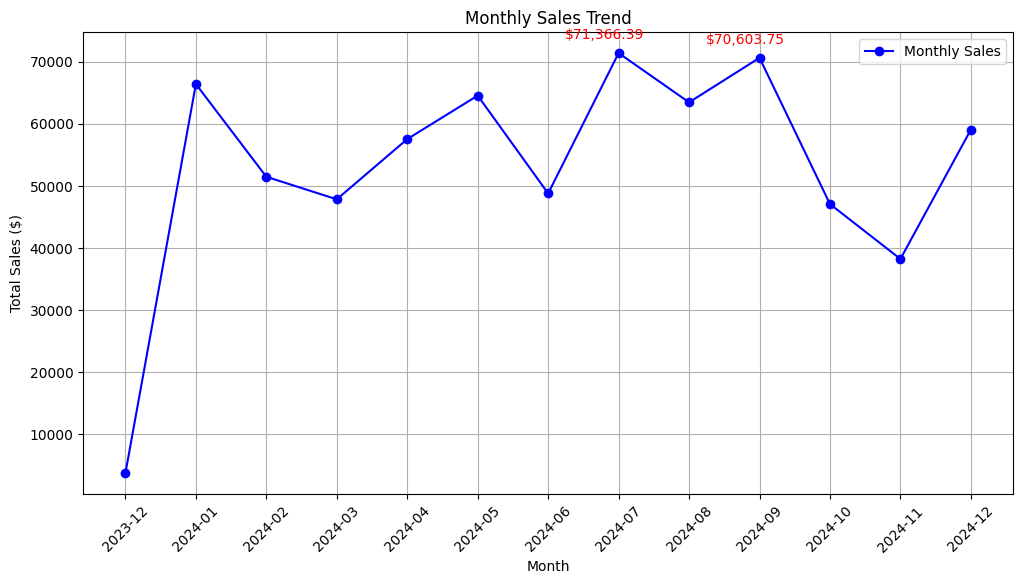

In [16]:
import matplotlib.pyplot as plt
from datetime import datetime

# Group sales data by month and sum total value
df_trans['TransactionMonth'] = df_trans['TransactionDate'].dt.to_period('M')
monthly_sales = df_trans.groupby('TransactionMonth')['TotalValue'].sum()

# Convert index to string for better visualization
monthly_sales.index = monthly_sales.index.astype(str)

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b', label='Monthly Sales')

# Highlight highest sales months
max_months = monthly_sales.nlargest(2)
for month, value in max_months.items():
    plt.annotate(f"${value:,.2f}", (month, value), textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10, color='red')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

**<h4>4. Region specific</h4>**

In [18]:
customer_distribution = merged_df['Region'].value_counts()
print(customer_distribution)


Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


**<h4>5. Revenue by cateogory</h4>**

In [22]:
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_by_category)


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
